# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
      * The paper explores the concept of data tidying, which is when data is restructured to make analysis easier. 
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
      * The tidy data standard has two goals: simplify data cleaning and to facilitate data analysis and tool development. Having a standard makes it easier to clean data because people don't have to "reinvent the wheel" each time and can save brainpower.
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
      * The first sentence about families is referring to the Leo Tolstoy quote, and means that tidy datasets adhere to a standardized structure and format, which makes them similar and consistent in their organization. In contrast, messy datasets vary widely in terms of how they are structured and formatted. There are many ways to be a messy dataset (or an unhappy family) but not many ways to be tidy (or happy).
      * The second sentence means that when you look at a specific dataset, it's often straightforward to identify what makes up individual data points (observations) and what represents the characteristics being measured (variables). However, when attempting to create a general, abstract definition that applies to all datasets, it becomes challenging because the concept of what makes a variable and an observation can change based on the context and dataset.
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
      * Values, according to Wickham, are the individual data points in a dataset, and they can be either quantitative (numbers) or qualitative (strings). They represent measurements or attributes of interest.
      * Variables are attributes or characteristics being measured or observed in a dataset. Variables group together all values that measure the same underlying attribute across different units or observations. 
      * Observations represent the individual units or entities being studied in a dataset. Each observation contains values measured on the same unit across various attributes or variables.
  5. How is "Tidy Data" defined in section 2.3?
      * Tidy data is defined as a standardized way of structuring a dataset, aligning data's meaning with its structure:
        - Each variable becomes a column.
        - Each observation becomes a row.
        - Each observational unit forms a separate table.
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
      * The 5 most common problems are:
        - Column headers as values, not variable names
        - Multiple variables stored in one column
        - Variables stored in both rows and columns
        - Multiple types of observational units stored in the same table
        - A single observational unit is stored in multiple tables
      * Table 4 is messy because it demonstrates the first problem, where column headers contain values instead of variable names. 
      * "Melting" a dataset refers to the process of transforming it from a wide format, where variables are represented as columns, into a long format, where values are stacked into rows. 
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
        * Table 11 is considered messy because it lacks the structured organization required for efficient data analysis, while Table 12 is tidy and "molten" because it has been transformed into a format that conforms to the principles of tidy data, making it more suitable for analysis and interpretation.
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
       * The "chicken-and-egg" issue in data wrangling is where the structure of data (tidy data) and the tools used for analysis (tidy tools) are interdependent. Tidy data is most beneficial when used with compatible tools, creating a challenge of mutual reliance. This situation can limit progress, as advancements in data analysis may be constrained by existing data structures and tools.
      * Wickham anticipates future improvements in data wrangling, both incrementally and through exploring alternative data structuring methods. He emphasizes the importance of considering human factors and user-centered design in tool development and envisions the tidy data framework evolving as more research is conducted in this area.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.1**
To clean the Price column, I removed commas and then converted it to numeric. I end up with 0 missing values.

In [2]:
import pandas as pd

# load dataset
airbnb_df = pd.read_csv('./data/airbnb_hw.csv')

# remove commas from col
airbnb_df['Price'] = airbnb_df['Price'].str.replace(',', '')

# convert col to numeric type
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce')

# count num of missing values in price col
missing_val_count = airbnb_df['Price'].isna().sum()

missing_val_count


0

**Q2.2**
To clean the Type variable, I combined all of the boating related values to be labeled as "Boating". I also combined all of the values that I felt were variations of "Unknown" and combined them as such.

In [3]:
# load dataset
sharks_df = pd.read_csv('./data/sharks.csv')

# display unique values
unique_types = sharks_df['Type'].unique()
unique_types

C:\Users\allard.ti\AppData\Local\Temp\ipykernel_36856\610896713.py:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks_df = pd.read_csv('./data/sharks.csv')


array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Boating', 'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [4]:
# combine 'boating' 'watercraft' 'boat' 'boatomg' 'sea disaster'
sharks_df['Type'] = sharks_df['Type'].replace(['Watercraft', 'Boat', 'Boatomg', 'Sea Disaster'], 'Boating')

# combine 'unconfirmed' 'unverified' 'questionable' 'under investigation' 'invalid' to 'unknown'
sharks_df['Type'] = sharks_df['Type'].replace(['Unconfirmed', 'Unverified', 'Questionable', 'Under investigation', 'Invalid'], 'Unknown')

# replace missing vals with unknown
sharks_df['Type'].fillna('Unknown', inplace=True)

# display updated unique values
updated_unique_types = sharks_df['Type'].unique()
updated_unique_types

array(['Unprovoked', 'Provoked', 'Unknown', 'Boating'], dtype=object)

**Q2.3** Cleaning `WhetherDefendantWasReleasedPretrial`. After looking through the codebook, I saw that `9` means "missing or unknown" so I replaced the value `9` with `nan`.

In [34]:
import numpy as np

# load dataset
pretrial_df = pd.read_csv('./data/VirginiaPretrialData2017.csv')

pretrial_df['WhetherDefendantWasReleasedPretrial'].head()

C:\Users\allard.ti\AppData\Local\Temp\ipykernel_36856\2577192225.py:4: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,

0    9
1    0
2    0
3    0
4    1
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [35]:
# Check the unique values and their counts in the 'released' column
unique_vals = pretrial_df['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False)
unique_vals


1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [36]:
# replace '9' with np.nan in the 'WhetherDefendantWasReleasedPretrial' column
pretrial_df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan, inplace=True)

# checking unique vals again
unique_values_pretrial_cleaned = pretrial_df['WhetherDefendantWasReleasedPretrial'].unique()

unique_values_pretrial_cleaned


array([nan,  0.,  1.])

**Q2.4**
Cleaned the `ImposedSentenceAllChargeInContactEvent` based on the `SentenceTypeAllChargesAtConvictionInContactEvent` column. For defendants with "Probation/no incarceration," I made it so that the imposed sentence duration is 0.
For defendants with sentence types of "Other" or "Not applicable," I marked the imposed sentence duration as missing (`nan`).

In [37]:
pretrial_df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [38]:
# inspect the unique values in the 'SentenceTypeAllChargesAtConvictionInContactEvent' column
unique_values_sentence_type = pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()

unique_values_sentence_type


array([9, 0, 1, 4, 2], dtype=int64)

In [39]:
sentence_distribution = pretrial_df.groupby('SentenceTypeAllChargesAtConvictionInContactEvent')['ImposedSentenceAllChargeInContactEvent'].value_counts()

sentence_distribution

SentenceTypeAllChargesAtConvictionInContactEvent  ImposedSentenceAllChargeInContactEvent
0                                                 0                                         4953
                                                  .985626283367556                           765
                                                  12                                         586
                                                  3                                          442
                                                  6                                          372
                                                                                            ... 
2                                                 960                                          1
                                                  98                                           1
                                                  98.95687885                                  1
4                                     

In [40]:
# for "Probation/no incarceration", set 'ImposedSentenceAllChargeInContactEvent' to 0
pretrial_df.loc[pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0, 'ImposedSentenceAllChargeInContactEvent'] = 0

# for "Other" and "Not applicable", set 'ImposedSentenceAllChargeInContactEvent' to np.nan
pretrial_df.loc[pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'].isin([4, 9]), 'ImposedSentenceAllChargeInContactEvent'] = np.nan

# verify the changes by inspecting the distribution again
sentence_distribution_cleaned = pretrial_df.groupby('SentenceTypeAllChargesAtConvictionInContactEvent')['ImposedSentenceAllChargeInContactEvent'].value_counts()

sentence_distribution_cleaned


SentenceTypeAllChargesAtConvictionInContactEvent  ImposedSentenceAllChargeInContactEvent
0                                                 0                                         8720
1                                                 12                                         788
                                                  6                                          437
                                                  3                                          345
                                                  .328542094455852                           337
                                                                                            ... 
2                                                 93                                           1
                                                  95                                           1
                                                  960                                          1
                                      

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [21]:
# 1 load data
college_df = pd.read_csv('./data/college_completion.csv')


In [19]:
# 2 dimensions
dim = college_df.shape
num_obsv = dim[0]
college_vars = college_df.columns

dim, num_obsv, college_vars, college_df.head()


((3798, 63),
 3798,
 Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
        'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
        'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
        'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
        'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
        'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
        'endow_value', 'endow_percentile', 'grad_100_value',
        'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
        'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
        'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
        'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
        'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
        'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
        'vsa_enroll_after6_first', 'vsa_

In [22]:
# 3 cross tabulate control and level
cross_tab = pd.crosstab(college_df['control'], college_df['level'])

cross_tab

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


**Q3.3**
Here I noticed that Private not-for-profit colleges are mostly 4-year colleges. Additionally, there are more Public 2-years than 4-years. Lastly, Private for-profit and not-for-profit are about evenly distributed.

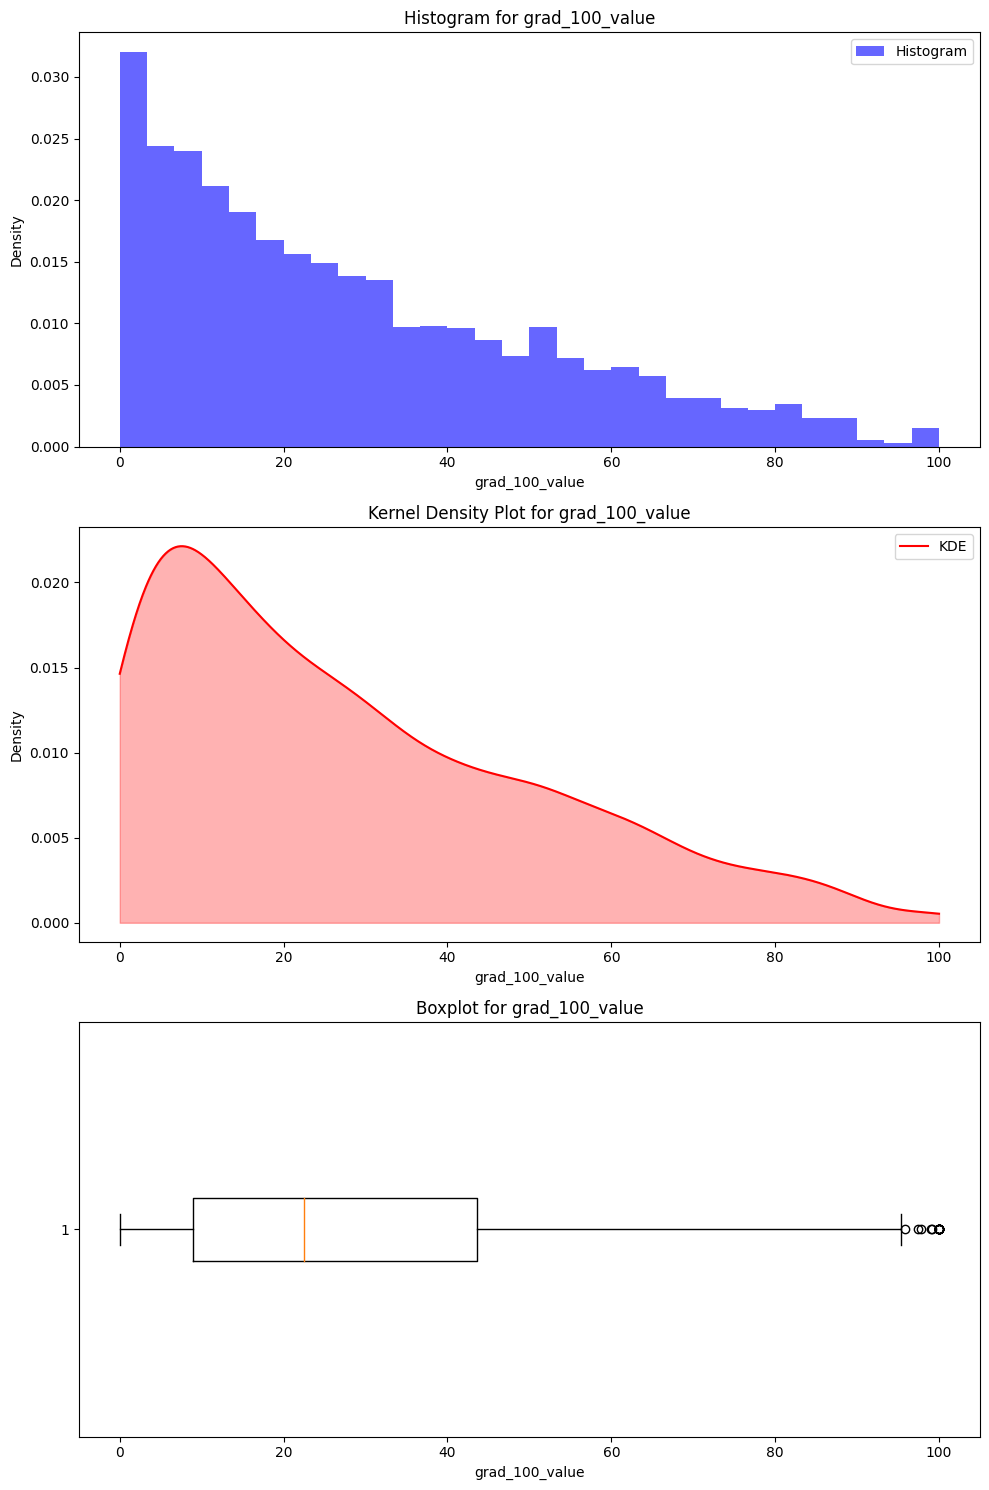

In [27]:
# 4 histogram, kernel density plot, boxplot, and statistical description
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# setting up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# histogram
ax[0].hist(college_df['grad_100_value'].dropna(), bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
ax[0].set_title('Histogram for grad_100_value')
ax[0].set_xlabel('grad_100_value')
ax[0].set_ylabel('Density')
ax[0].legend()

# kernel density plot
density = gaussian_kde(college_df['grad_100_value'].dropna())
x_vals = np.linspace(min(college_df['grad_100_value'].dropna()), max(college_df['grad_100_value'].dropna()), 1000)
y_vals = density(x_vals)
ax[1].plot(x_vals, y_vals, color='red', label='KDE')
ax[1].fill_between(x_vals, y_vals, color='red', alpha=0.3)
ax[1].set_title('Kernel Density Plot for grad_100_value')
ax[1].set_xlabel('grad_100_value')
ax[1].set_ylabel('Density')
ax[1].legend()

# boxplot
ax[2].boxplot(college_df['grad_100_value'].dropna(), vert=False)
ax[2].set_title('Boxplot for grad_100_value')
ax[2].set_xlabel('grad_100_value')

plt.tight_layout()
plt.show()


**Q3.4** Description:

- Histogram: This shows the distribution of grad_100_value. The density of the histogram indicates that many institutions have a completion rate around 10%.

- Kernel Density Plot: This plot provides a smoothed version of the histogram, highlighting the distribution of grad_100_value.

- Boxplot: The boxplot offers insights into the spread and potential outliers of the grad_100_value distribution. The median is around 22.5%, with the interquartile range (IQR) spanning from 9% to 43.65%. There are a few institutions with completion rates close to 100%.

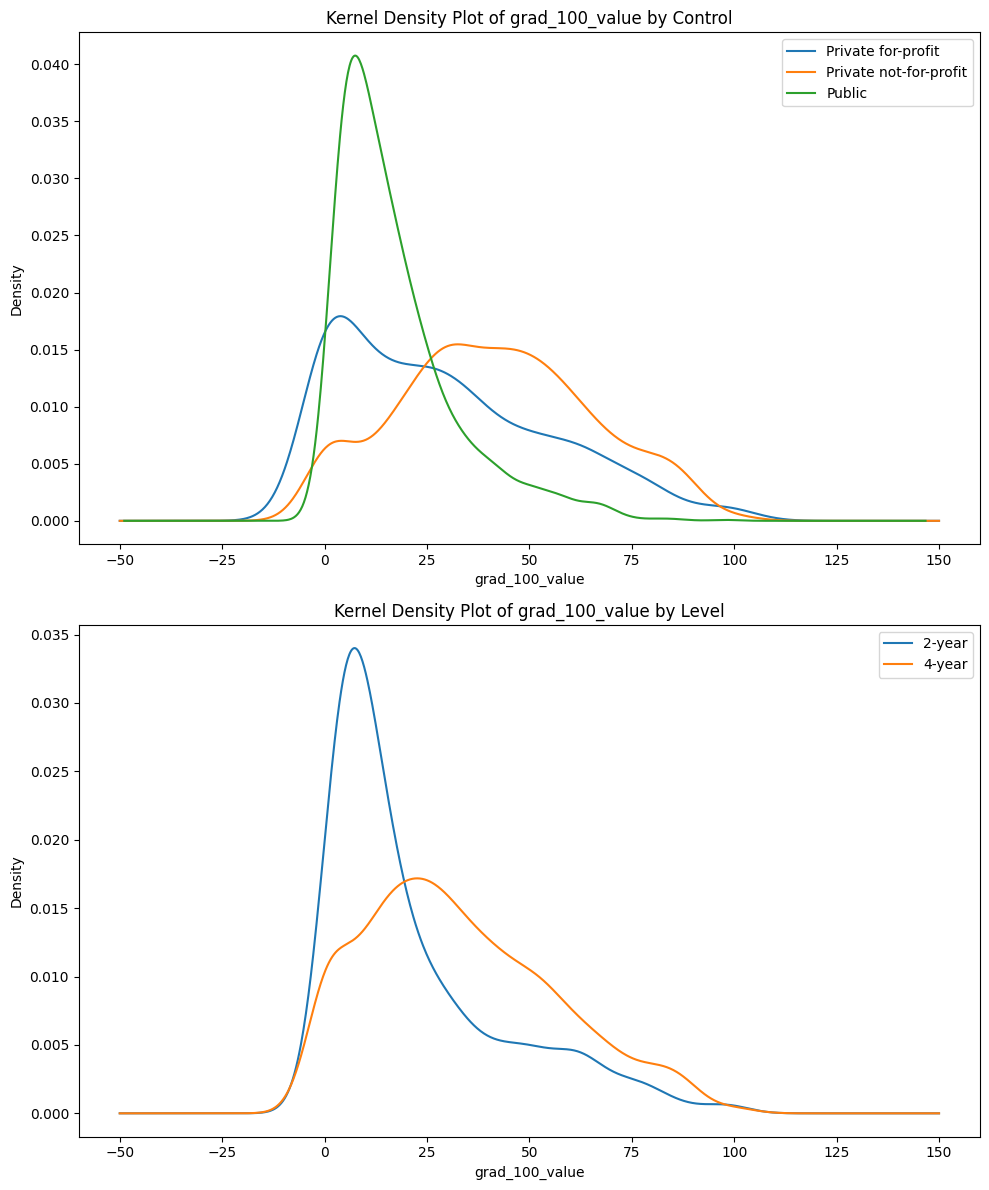

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

In [28]:
# 5 grouped kdp for grad_100_value by control and level

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# by control
for label, group_data in college_df.groupby('control'):
    group_data['grad_100_value'].dropna().plot(kind='kde', ax=ax[0], label=label)
ax[0].set_title('Kernel Density Plot of grad_100_value by Control')
ax[0].set_xlabel('grad_100_value')
ax[0].set_ylabel('Density')
ax[0].legend()

# by level
for label, group_data in college_df.groupby('level'):
    group_data['grad_100_value'].dropna().plot(kind='kde', ax=ax[1], label=label)
ax[1].set_title('Kernel Density Plot of grad_100_value by Level')
ax[1].set_xlabel('grad_100_value')
ax[1].set_ylabel('Density')
ax[1].legend()

plt.tight_layout()
plt.show()

# grouped calculations of statistical descriptions of grad_100_value by level and control
grouped_stats = college_df.groupby(['level', 'control'])['grad_100_value'].describe()

grouped_stats


**Q3.5** 

By Control:
- Private for-profit institutions show a wider range of graduation rates, with two noticeable peaks, one around 10% and another around 60%.
- Private not-for-profit institutions are more concentrated around 40-60% graduation rates.
- Public institutions tend to have lower graduation rates, with the majority of them being below 20%.

By Level:
- 2-year institutions tend to have a more spread-out range of graduation rates, with many of them having rates below 20%.
- 4-year institutions have a peak around the 10% graduation rate and another peak around the 50% rate.

Statistical Descriptions:

2-year Institutions:
- Private for-profit: Average graduation rate is around 37.20%.
- Private not-for-profit: Average graduation rate is around 41.91%.
- Public: Average graduation rate is only about 12.40%.

4-year Institutions:
- Private for-profit: Average graduation rate is around 17.38%.
- Private not-for-profit: Average graduation rate is around 41.65%.
- Public: Average graduation rate is around 25.56%.

Which institutions appear to have the best graduation rates?
Based on the mean values, Private not-for-profit institutions, especially those that are 4-year, tend to have the highest average graduation rates.

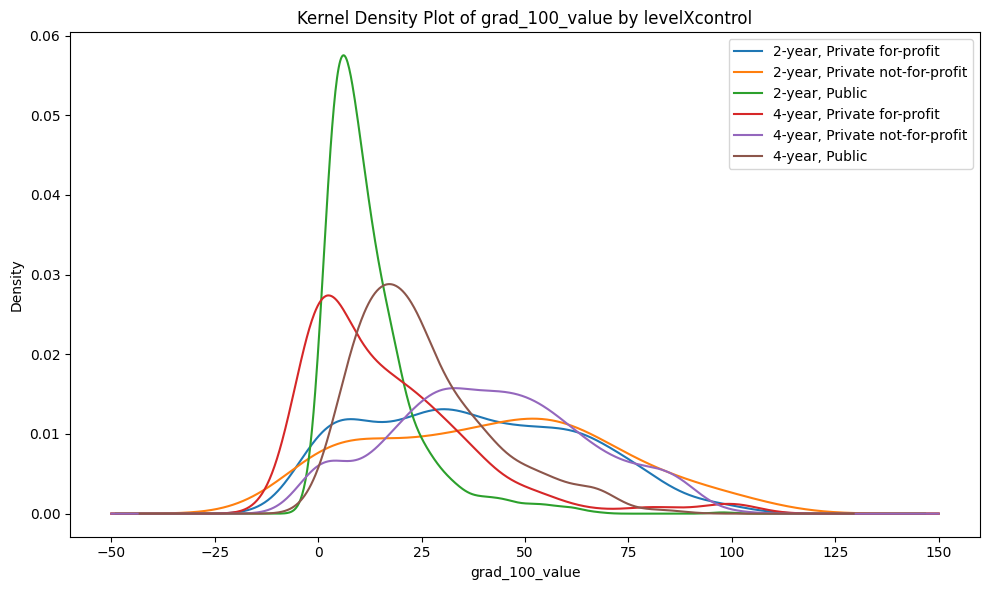

,count,mean,std,min,25%,50%,75%,max
levelXcontrol,,,,,,,,
"2-year, Private for-profit",461.0,37.197614,25.497380,0.0,15.800,33.9,57.800,100.0
"2-year, Private not-for-profit",68.0,41.913235,28.348302,0.0,16.225,44.4,61.200,100.0
"2-year, Public",926.0,12.400000,10.893600,0.0,5.100,9.4,16.175,97.8
"4-year, Private for-profit",318.0,17.382704,20.788525,0.0,0.000,12.5,26.325,100.0
"4-year, Private not-for-profit",1121.0,41.645674,23.243453,0.0,25.000,41.0,57.800,100.0
"4-year, Public",573.0,25.561082,16.403902,0.0,13.600,21.8,33.800,86.3


In [29]:
# 6
# creating the new variable 'levelXcontrol'
college_df['levelXcontrol'] = college_df['level'] + ', ' + college_df['control']

# grouped Kernel Density Plot for grad_100_value by levelXcontrol
plt.figure(figsize=(10, 6))

for label, group_data in college_df.groupby('levelXcontrol'):
    group_data['grad_100_value'].dropna().plot(kind='kde', label=label)

plt.title('Kernel Density Plot of grad_100_value by levelXcontrol')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# grouped calculations of statistical descriptions of grad_100_value by levelXcontrol
grouped_stats_levelXcontrol = college_df.groupby('levelXcontrol')['grad_100_value'].describe()

grouped_stats_levelXcontrol


**Q3.6**

Kernel Density Plot:

- 2-year, Private for-profit: Shows two noticeable peaks, one around 10% and another around 60%.
- 2-year, Private not-for-profit: More concentrated around 40-60% graduation rates.
- 2-year, Public: Primarily concentrated below 20% graduation rates.
- 4-year, Private for-profit: Has a peak around 0-10% and another peak around 20-30%.
- 4-year, Private not-for-profit: Displays a distribution with a peak around 40-60% graduation rates.
- 4-year, Public: Spread between 0% to around 40%, with a noticeable peak around 10-20%.

Statistical Descriptions:
The statistical descriptions for levelXcontrol are consistent with our previous breakdown for level and control separately. However, combining these two variables provides more granular insights into the institutions.

Which institutions appear to have the best graduation rates based on the levelXcontrol variable?
The 4-year, Private not-for-profit institutions have the highest average graduation rates, with a mean of approximately 41.65%.

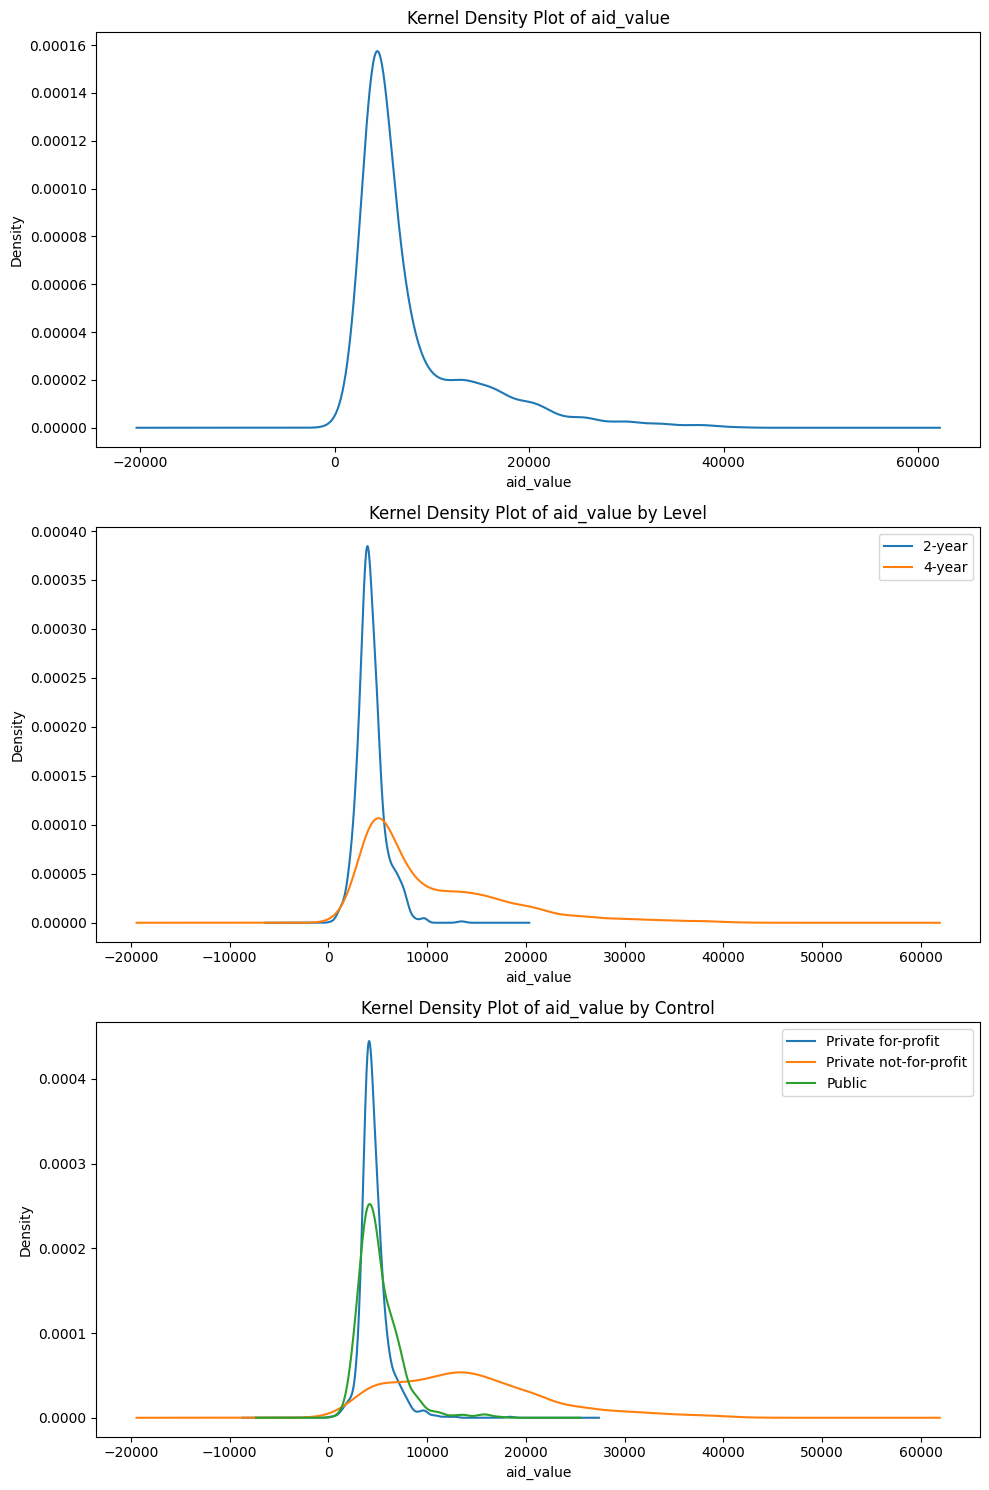

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

In [30]:
# 7 Kernel Density Plot for aid_value
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# overall KDE for aid_value
college_df['aid_value'].dropna().plot(kind='kde', ax=ax[0])
ax[0].set_title('Kernel Density Plot of aid_value')
ax[0].set_xlabel('aid_value')
ax[0].set_ylabel('Density')

# grouped KDE by level
for label, group_data in college_df.groupby('level'):
    group_data['aid_value'].dropna().plot(kind='kde', ax=ax[1], label=label)
ax[1].set_title('Kernel Density Plot of aid_value by Level')
ax[1].set_xlabel('aid_value')
ax[1].set_ylabel('Density')
ax[1].legend()

# grouped KDE by control
for label, group_data in college_df.groupby('control'):
    group_data['aid_value'].dropna().plot(kind='kde', ax=ax[2], label=label)
ax[2].set_title('Kernel Density Plot of aid_value by Control')
ax[2].set_xlabel('aid_value')
ax[2].set_ylabel('Density')
ax[2].legend()

plt.tight_layout()
plt.show()

# grouped calculations of statistical descriptions of aid_value by level and control
grouped_stats_aid = college_df.groupby(['level', 'control'])['aid_value'].describe()

grouped_stats_aid


**Q3.7**

Kernel Density Plots:

Overall KDE for aid_value: The plot shows a bimodal distribution, with two peaks indicating two common ranges for the amount of student aid.

By Level:
- 2-year institutions are concentrated around the lower peak, suggesting that these institutions tend to offer lower student aid amounts.
- 4-year institutions contribute to both peaks, but with a noticeable contribution to the higher aid values.

By Control:
- Private for-profit and Public institutions predominantly contribute to the lower peak.
- Private not-for-profit institutions are responsible for the higher peak, indicating that they generally offer higher amounts of student aid.

Statistical Descriptions:

2-year Institutions:
- Private for-profit: Average aid value is around $4,559.68.
- Private not-for-profit: Average aid value is around $5,128.06.
- Public: Average aid value is about $4,126.20.

4-year Institutions:
- Private for-profit: Average aid value is around $4,696.06.
- Private not-for-profit: Average aid value is around $14,702.- 40, which is considerably higher than other groups.
- Public: Average aid value is around $6,514.07.

What explains the bi-modal nature of the graph?
The bimodality can be attributed to the differences in the average student aid provided by different types of institutions. Specifically, Private not-for-profit 4-year institutions tend to provide much higher student aid on average, leading to the second peak in the overall distribution.

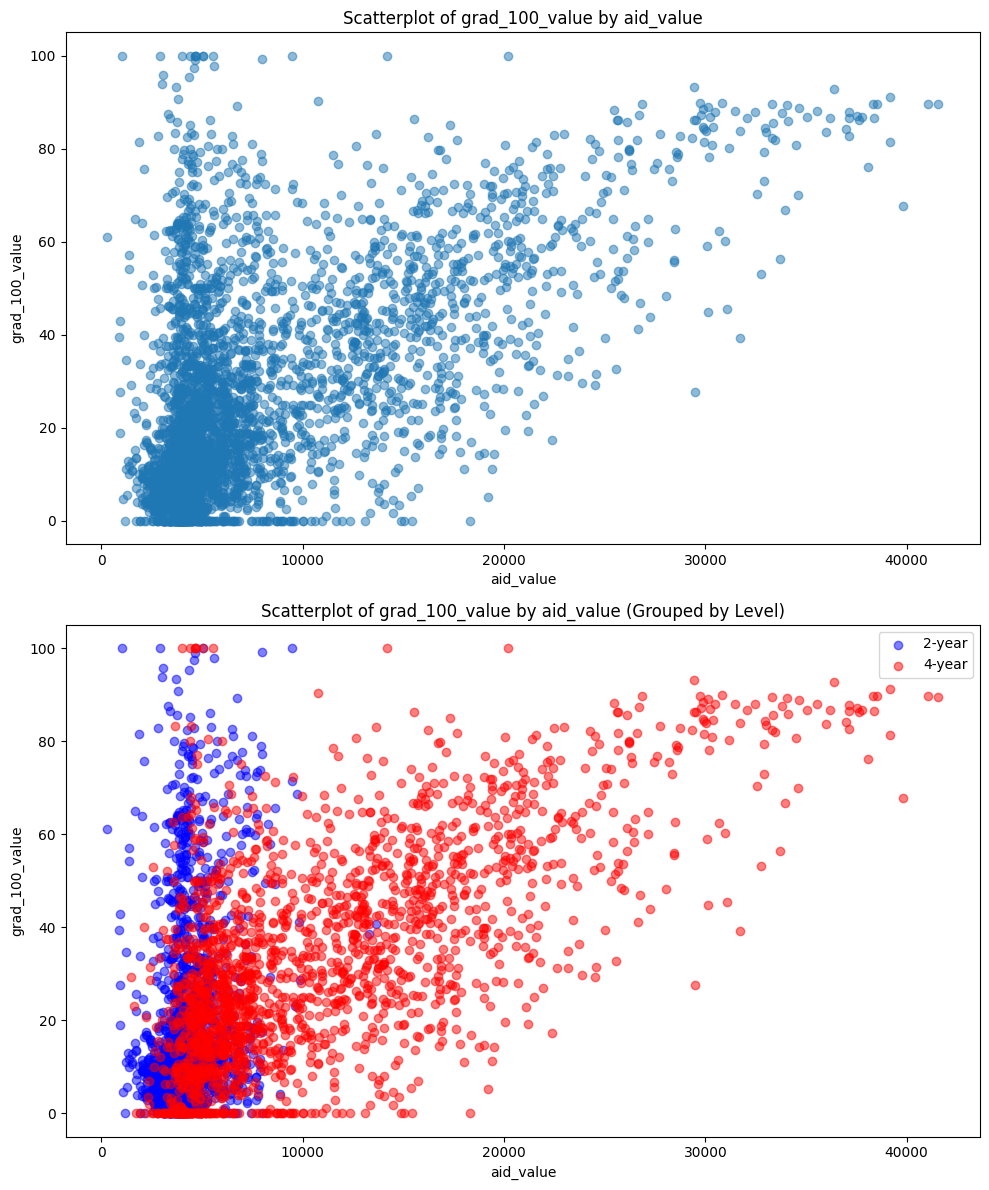

In [31]:
# scatterplot of grad_100_value by aid_value
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# overall scatterplot
ax[0].scatter(college_df['aid_value'], college_df['grad_100_value'], alpha=0.5)
ax[0].set_title('Scatterplot of grad_100_value by aid_value')
ax[0].set_xlabel('aid_value')
ax[0].set_ylabel('grad_100_value')

# scatterplot grouped by level
colors = {'2-year': 'blue', '4-year': 'red'}
for level, group in college_df.groupby('level'):
    ax[1].scatter(group['aid_value'], group['grad_100_value'], alpha=0.5, label=level, color=colors[level])
ax[1].set_title('Scatterplot of grad_100_value by aid_value (Grouped by Level)')
ax[1].set_xlabel('aid_value')
ax[1].set_ylabel('grad_100_value')
ax[1].legend()

plt.tight_layout()
plt.show()


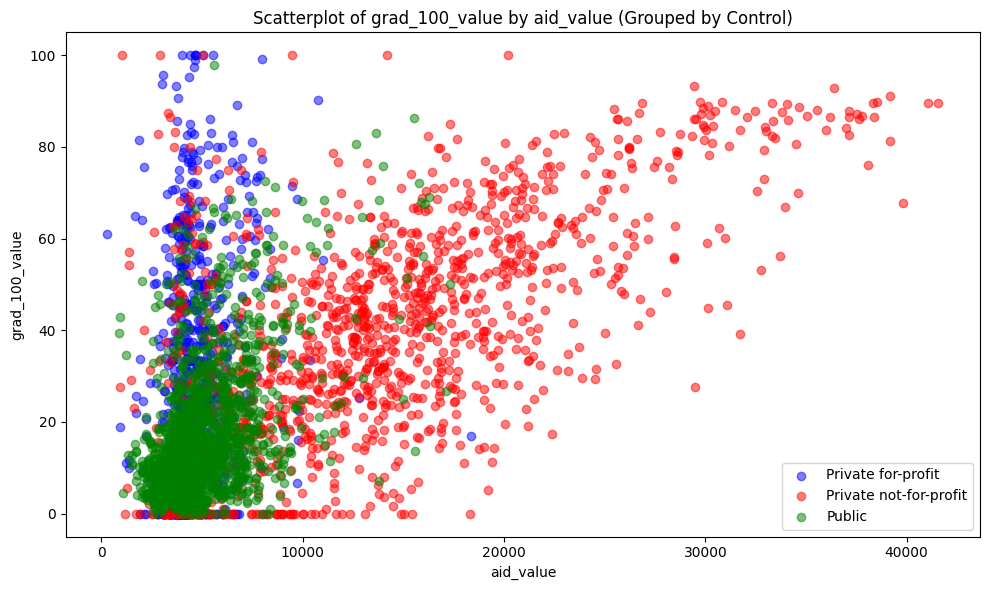

In [32]:
# scatterplot of grad_100_value by aid_value grouped by control
plt.figure(figsize=(10, 6))

colors = {'Private for-profit': 'blue', 'Private not-for-profit': 'red', 'Public': 'green'}
for control, group in college_df.groupby('control'):
    plt.scatter(group['aid_value'], group['grad_100_value'], alpha=0.5, label=control, color=colors[control])

plt.title('Scatterplot of grad_100_value by aid_value (Grouped by Control)')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.legend()
plt.tight_layout()
plt.show()


**Q3.8**

Overall Scatterplot: The scatterplot of `grad_100_value` by aid_value shows a general positive relationship between the amount of student aid and graduation rates. Institutions that offer more student aid tend to have higher graduation rates. However, there is a wide spread in the data, suggesting other factors at play.

By Level:
- 2-year institutions (in blue) tend to cluster in the lower aid and lower graduation rate region.
- 4-year institutions (in red) have a wider range of aid values and generally higher graduation rates.

By Control:
- Private for-profit institutions (in blue) predominantly cluster in the lower aid and lower graduation rate region.
- Private not-for-profit institutions (in red) show a wider range of aid values and generally higher graduation rates.
- Public institutions (in green) are spread across various aid values but tend to have graduation rates below 40%.

Which kinds of institutions does aid seem to increase graduation rates?
There is not enough of a distinct trend about graduation rates to come to a conclusion about the impact aid has on it. For example, Private for-profit schools give a very small amount of aid but have a large distribution in graduation rates, and Public schools overall seem to have lower graduation rates in general. A positive correlation can be seen in Private not-for-profit schools, but there is still a peak in graduation rates around the lower amount of aid given. 

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.